# A Statistical Analysis of the Virginia Smart Scale Scoring Methodology

#### September 17, 2018

#### Christopher Garcia, Ph.D., Mukesh Srivastava, D.B.A.
#### University of Mary Washington, Center for Business Research

## Executive Summary

The Smart Scale methodology is intended to provide an objective, transparent, and consistent way to evaluate and compare the benefits of competing transportation projects in Virginia. This study provides a statistical analysis of a set of 404 Smart Scale Round 2 projects scored using the Smart Scale methodology. The study's first goal was to provide a basic characterization of the Smart Scale score distribution across different project features, while the second goal was to answer the following two questions:

1. Was the Smart Scale methodology applied consistently across all projects?

2. If Accessibility (a key concern for the Fredericksburg area) was prioritized in Smart Scale score calculation for area types A and D (the area types where Fredericksburg projects occur), how would this impact the competitiveness of Fredericksburg-based projects?

To answer the first question, the Smart Scale scores were independently calculated for each project using the methodology prescribed in the November 2017 Smart Scale Technical Guide. These scores were then compared to the project scores assigned by the state. There was no discrepancy between the calculated scores and scores assigned by the state, indicating that the Smart Scale methodology was consistently applied accross all projects. 

To answer the second question, two alternative scenarios were used which both increased the importance of Accessibility in the  scoring calculation. All projects were scored according to the methodology defined in each scenario, and the percentile rankings of the Fredericksburg scores under each alternative scenario were compared to that obtained by the current methodology. There were small increases in percentile rankings of Fredericksburg project scores under the two alternative scenarios when compared to the current scoring methodology. This suggests that the full impact of Fredericksburg-based projects may be underestimated under the current Smart Scale methodology.


## I. Introduction

The Virginia Smart Scale methodology was finalized in November 2017 in order to provide an objective scoring system for the state's transportation projects competing for funding. The complete technical specification of the Smart Scale methodology can be found in the November 2017 technical guide, found here: [http://vasmartscale.org/documents/20171115/ss_technical_guide_nov13_2017.pdf](http://vasmartscale.org/documents/20171115/ss_technical_guide_nov13_2017.pdf).

The purpose of this analysis is 1) to provide a descriptive statistical characterization of recently funded projects, 2) to independently assess whether the Smart Scale scores (abbreviated by SSS hereafter) assigned to these projects were consistent with the Smart Scale methodology as specified in the technical guide, and 3) to determine how increasing the emphasis on Accessibility (which is a major concern to the Fredericksburg area) in the SSS calculation methodology would impact the competitiveness of Fredericksburg-based projects. This analysis uses a dataset provided by the Fredericksburg Area Metropolitan Planning Organization (FAMPO), containing data on 404 Smart Scale Round 2 projects. This analysis also uses the R statistical computing environment within a Jupyter notebook. This allows the analysis to be both explained as well as executed. It furthermore enables complete transparancy of the analytical methodology and code used in its execution. This removes any ambiguity and also guarantees reproducibility of the results.

## II. Data Inspection and Preparation

The data was provided in a Microsoft Excel spreadsheet. This spreadsheet was first converted to a CSV file (ss-data.csv) and then a number of transformation processes were applied to clean and scale the data as well as to impute missing values. To begin, we first import several libraries which will be used later on and also define several functions which will be used in the data preparation:

In [15]:
# Turn off verbose output messages.
options(warn=0)

# Include all libraries that will be used in this notebook's code
library(ggplot2)
library(gridExtra)

# Given a vector, a vector of original values, and a corresponding vector of 
# replacement values, apply the replacements and return the transformed vector.
recode <- function(vec, from.vals, to.vals) {
    f = function(v) {
        for(i in 1:length(from.vals)) {
            if(v == from.vals[i]) { return(to.vals[i]) }
        }
        return(v)
    }
    return(sapply(as.vector(vec), f))
}

# Function for imputing mean of a vector to its missing values.
impute.mean <- function(vec) {
    vec[is.na(vec)] = mean(vec, na.rm=TRUE)
    vec
}

# Function for imputing value of 0 to each missing value in the vector.
impute.0 <- function(vec) {
    vec[is.na(vec)] = 0
    vec
}

Next we read in the dataset and inspect the first few rows of data:

In [16]:
data <- read.csv('ss-data.csv')
head(data)

App.Id,Area.Type,District,Organization.Name,Project.Title,Statewide.High.Priority,District.Grant,Throughput.Score,Delay.Score,Crash.Frequency.Score,...,Travel.Time.Reliability.Score,Land.Use.Score,Project.Benefit.Score,Total.Project,Score.Divided.by.Total.Cost,SMART.SCALE.Request,SMART.SCALE.Score,Benefit.Rank,State.Rank,District.Rank
1414,A,NOVA,Northern Virginia Transportation Commission,VRE Fredericksburg Line Capacity Expansion,x,,17.69,87.66,100,...,-,64.016,64.236,216034920,2.973,92636120,6.934,1,109,16
1057,A,Hampton Roads,Hampton Roads Transportation Planning Organization,I-64 Southside Widening and High Rise Bridge - Phase 1,x,,100,88.96,45.16,...,29.044,10.464,62.042,600000000,1.034,100000000,6.204,2,120,22
1090,A,Hampton Roads,Hampton Roads Transportation Planning Organization,I-64/I-264 Interchange Improvements,x,,60.61,53.86,-,...,24.245,31.671,48.747,350091800,1.392,50000000,9.749,3,79,18
1293,A,NOVA,Prince William County,Route 234 At Balls Ford Intrchng and Rel/Widen Balls Ford Rd,x,x,65.48,100,15.61,...,1.05,-,41.289,126027000,3.276,124027000,3.329,4,170,30
1249,A,NOVA,Fairfax County,VA 286 - Popes Head Road Interchange,x,x,61.09,54.17,8.22,...,0.118,-,37.194,64303070,5.784,50558370,7.357,5,101,14
1240,A,NOVA,Loudoun County,Loudoun County Parkway (Shellhorn Road to US Route 50),x,x,45.27,69.78,5.43,...,1.6,16.364,33.732,112053000,3.01,112053000,3.01,6,179,32


In the technical guide (Table 4.2, p. 36) there are six major factors used to compute the Smart Scale score, which are themselves calculated from more basic measurements:

1. Congestion Mitigation
2. Economic Development
3. Accessibility
4. Safety
5. Environmental Quality
6. Land Use

Of these six factors only Land Use is directly given in the dataset. All other major metrics are calculated from their basic constituent measurements as specified on pages 27-31. Within the data there are four area types: A, B, C, and D. Each of these area types has a unique factor weighting used in calculating in its Smart Scale Score. These weightings are specified for each area in Table 4.2 on page 36 within the technical guide. It is noted that for areas C and D, the Land Use factor is not used (or equivalently, carries 0% weight). Upon inspection of the whole dataset it was apparent that this was represented by empty cells for projects falling within these area types. Accordingly, all such Land Use values are set to 0. By this precedent it also is taken that all empty cells in numeric columns correspond to zero. Accordingly, a value of zero is imputed to all empty cells.

Based upon this, the following basic transformations are made to the data prior to analysis:

* All columns with present/absent markers (x and no x) are recoded to 1 and 0, respectively. This converts them into a numeric equivalent (called binarization).

* All empty cells in basic constituent measurement columns (which are used in calculating the factors) and other numeric values are changed to zero.

* All empty cells in the Land Use column are changed to zero.

Additionally, prior to imputing zeros to empty cells we inspect the percentages of empty cells in the numeric colums. All this is done as follows:

In [17]:
# Clean and recode numeric columns.
numeric.columns <- colnames(data)[8:ncol(data)]
for(col in numeric.columns) {
    data[[col]] <- suppressWarnings(as.numeric(as.character(data[[col]]))) 
}

imputer.f <- impute.0 # Missing value imputation function - can change if needed

# Impute missing values to component scores and print out the percent missing in each column
missing.ind <- 1
missing.perc <- c()
missing.titles <- c()
for(i in 8:ncol(data)) {
    missing.titles[missing.ind] <- colnames(data)[i]
    missing.perc[missing.ind] <- round(100*(1 - (length(sort(data[[i]]))/nrow(data))), 2) 
    data[[i]] <- imputer.f(data[[i]])
    missing.ind <- missing.ind + 1
}

# Properly binarize binary columns.
data$Statewide.High.Priority <- as.numeric(sapply(data$Statewide.High.Priority, function(x){if(x == 'x') return(1); return(0);}))
data$District.Grant <- as.numeric(sapply(data$District.Grant, function(x){if(x == 'x') return(1); return(0);}))

# Display summary of missing values
data.frame(Column_Name=missing.titles, Percent_Missing_Values=missing.perc)

Column_Name,Percent_Missing_Values
Throughput.Score,30.94
Delay.Score,25.99
Crash.Frequency.Score,17.08
Crash.Rate.Score,19.80
Access.to.Jobs,33.91
Disadvantaged.Access.to.Jobs,33.91
Multimodal.Access.Score,41.34
Air.Quality.Score,34.16
Enviro.Impact.Score,0.99
Econ.Dev.Support.Score,37.87


In the output above, the percentage of missing values in the key numeric columns ranges from 0% to 74%. We note that 74% of rows are missing a SMART.SCALE.Score and Project.Benefit.Score, meaning that only 26% of the projects have a Project Benefit Score and Smart Scale Score assigned - which is interpreted as only 26% of the projects having a Project Benefit Score and Smart Scale Score greater than zero.


## III. Data Exploration

In this section we explore the data further using descriptive statistics to provide several characterizations. We begin by looking at the overall distribution of Smart Scale Scores (SSS) ordered from least to greatest:


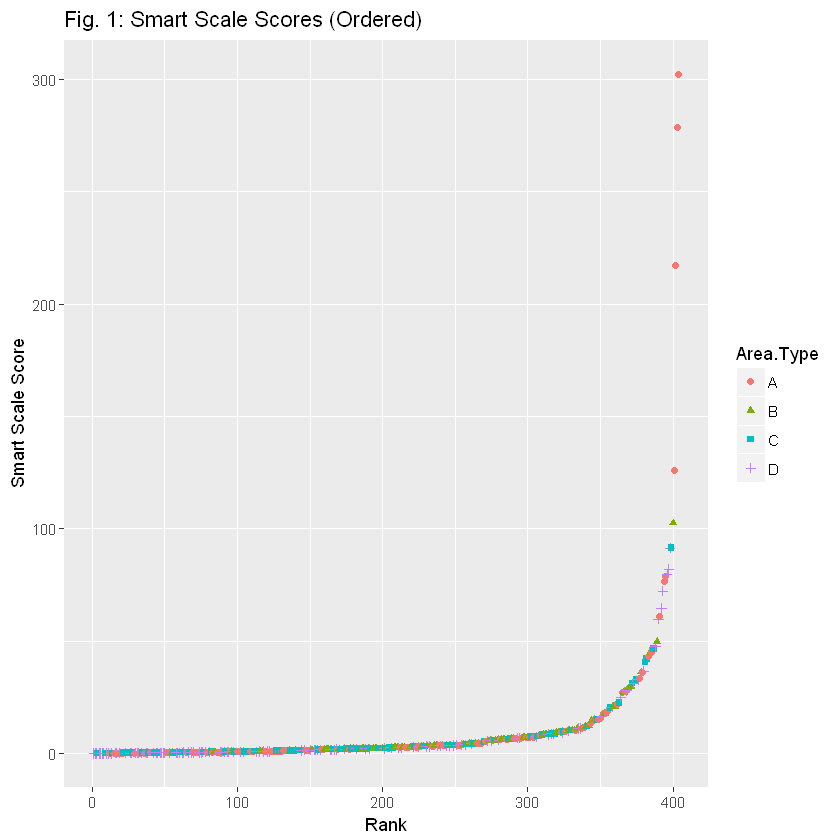

In [18]:
sssr <- data[order(data$SMART.SCALE.Score),]
sssr <- cbind(sssr, data.frame(ind=1:nrow(data)))
ggplot(sssr, aes(x=ind, y=SMART.SCALE.Score, shape=Area.Type, color=Area.Type)) +
    geom_point() +
    labs(x='Rank', y='Smart Scale Score', 
         title='Fig. 1: Smart Scale Scores (Ordered)')

In Fig. 1 above, the SSS's appear to follow a power law, with a long tail on the left and a relatively small number of projects having extreme scores. The distribution of scores clearly does not follow a linear pattern. Below we inspect the percentile thresholds from this sample by SSS:

In [19]:
sss.ord <- sort(data$SMART.SCALE.Score)
percentiles <- c(0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95)
cut.scores <- sapply(percentiles, function(p){sss.ord[ceiling(p * nrow(data))]})
percentile.cutoffs <- data.frame(Percentile=100 * percentiles, Score=cut.scores)
percentile.cutoffs

Percentile,Score
5,0.149
10,0.283
25,0.737
50,2.301
75,7.347
90,25.141
95,44.623


Because only a small number of projects exceed a SSS of 30, we will truncate all subsequent exploratory visualizations at 30 to best enable the majority variation to be seen clearly.

### 3.1 Descriptive Statistics for Majority (Lower-Scoring) Projects (SSS < 30)

To drill down further, we look at the distribution of Smart Scale Scores by area type and district. We begin with area type, looking at the number of projects within each of the four area types together with their average and median smart scale scores:

In [20]:
dt1 <- data.frame(table(data$Area.Type))
m1 <- data.frame(aggregate(data$SMART.SCALE.Score ~ data$Area.Type, FUN=mean))
mm1 <- data.frame(aggregate(data$SMART.SCALE.Score ~ data$Area.Type, FUN=median))
dt1 <- cbind(dt1, m1$data.SMART.SCALE.Score, mm1$data.SMART.SCALE.Score)
colnames(dt1) <- c('Area_Type', 'Num_Projects', 'Mean_Smart_Scale_Score', 'Median_Smart_Scale_Score')
dt1

Area_Type,Num_Projects,Mean_Smart_Scale_Score,Median_Smart_Scale_Score
A,114,16.287246,2.9795
B,88,8.776795,4.3685
C,86,6.257140,1.9760
D,116,7.978250,1.4635


By comparing the mean SSS to the medians, it is apparant that the few high-scoring projects significantly inflate the means. Below we look more closely at the spread of the SSS by area type (truncated at 30, as discussed above):

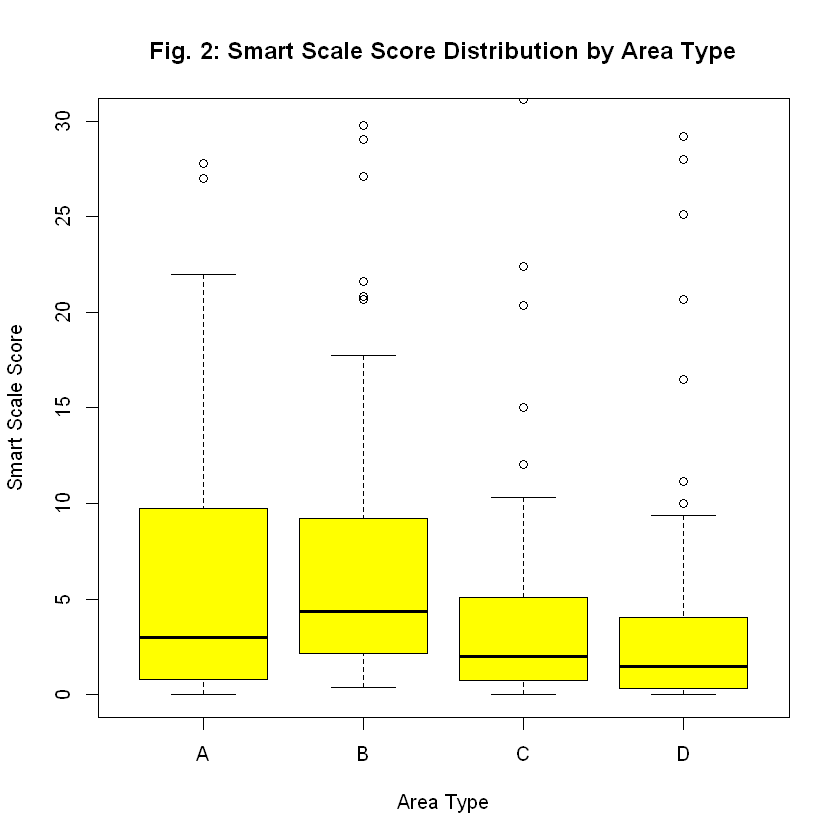

In [21]:
boxplot(SMART.SCALE.Score~Area.Type,data=data, main="Fig. 2: Smart Scale Score Distribution by Area Type",
        xlab="Area Type", ylab="Smart Scale Score", ylim=c(0, 30), col="yellow") 

In Fig. 2 above, area type A has the greatest amount of variance while area type D has the least. Area types C and D have similar distribution profiles, with area type D having the lowest overall median.

Below we shift our perspective to look at SSS with respect to district. We begin with a basic summarization of scores by district:

In [22]:
dt2 <- data.frame(table(data$District))
m2 <- data.frame(aggregate(data$SMART.SCALE.Score ~ data$District, FUN=mean))
mm2 <- data.frame(aggregate(data$SMART.SCALE.Score ~ data$District, FUN=median))
dt2 <- cbind(dt2, m2$data.SMART.SCALE.Score, mm2$data.SMART.SCALE.Score)
colnames(dt2) <- c('District', 'Num_Projects', 'Mean_Smart_Scale_Score', 'Median_Smart_Scale_Score')
dt2

District,Num_Projects,Mean_Smart_Scale_Score,Median_Smart_Scale_Score
Bristol,42,1.160738,0.4695
Culpeper,35,3.597029,2.1690
Fredericksburg,25,8.902320,1.8640
Hampton Roads,52,23.536212,2.0735
Lynchburg,28,9.429893,1.7990
NOVA,58,11.844241,3.3630
Richmond,72,7.878069,3.2880
Salem,50,10.277980,2.5410
Staunton,42,10.463905,2.7075


In a manner similar to above, we see the extreme high-scoring projects inflating the means. In Fig. 3 below the distribution of scores by district is shown.

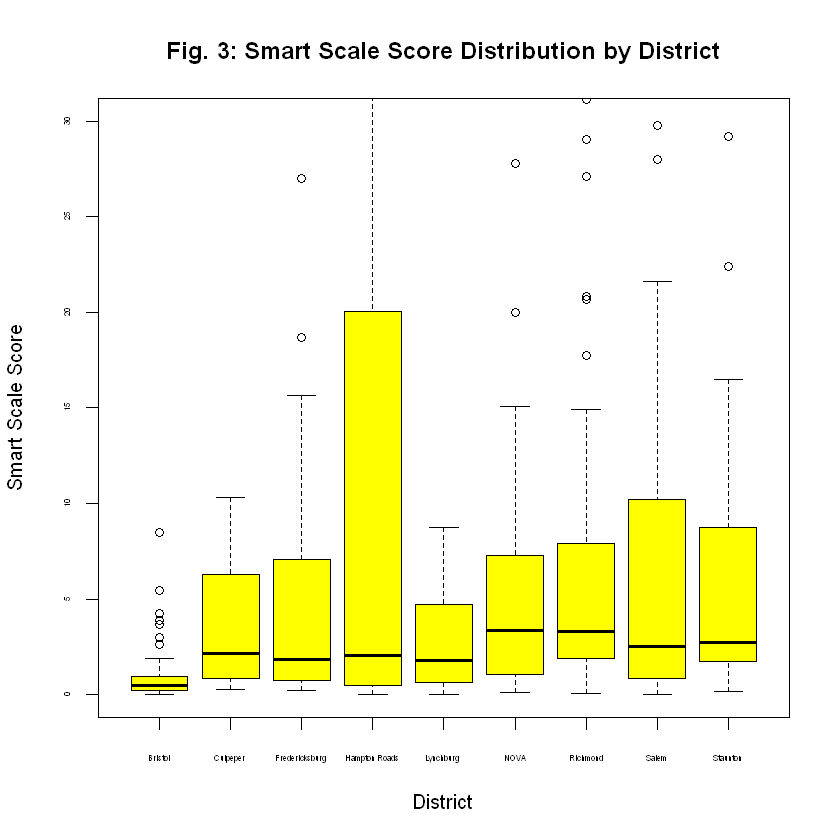

In [23]:
boxplot(SMART.SCALE.Score~District,data=data, main="Fig. 3: Smart Scale Score Distribution by District",
        xlab="District", ylab="Smart Scale Score", ylim=c(0, 30), col="yellow", cex.axis=0.4) 

In Fig. 3 the Hampton Roads district has significantly more variance than all other districts, while NOVA and Richmond have the highest medians scores.

### 3.2 Descriptive Statistics for Minority High-Scoring Projects (SSS > 30)

Up to now the exploration has been focused on the majority of projects which tend toward the lower range of SSS. We turn our attention to the scores falling on the far right of Fig. 1 ranging from 30 and above. We first tabulate the number of projects falling in this range by area type:

In [24]:
high.ss <- subset(data, SMART.SCALE.Score >= 30)
dt3 <- data.frame(table(high.ss$Area.Type))
m3 <- data.frame(aggregate(high.ss$SMART.SCALE.Score ~ high.ss$Area.Type, FUN=mean))
mm3 <- data.frame(aggregate(high.ss$SMART.SCALE.Score ~ high.ss$Area.Type, FUN=median))
dt3 <- cbind(dt3, m3$high.ss.SMART.SCALE.Score, mm3$high.ss.SMART.SCALE.Score)
colnames(dt3) <- c('Area_Type', 'Num_Projects', 'Mean_Smart_Scale_Score', 'Median_Smart_Scale_Score')
dt3

Area_Type,Num_Projects,Mean_Smart_Scale_Score,Median_Smart_Scale_Score
A,13,105.97615,61.1800
B,4,58.23500,47.1480
C,6,47.45583,41.3365
D,10,59.80840,62.2070


We see above that area types A and D have the majority of these high-scoring projects. A similar breakdown by district is shown below.

In [25]:
dt4 <- data.frame(District=unique(data$District))
dt4 <- merge(dt4, data.frame(table(high.ss$District)), by.x='District', by.y='Var1', all.x=TRUE)
m4 <- data.frame(aggregate(high.ss$SMART.SCALE.Score ~ high.ss$District, FUN=mean))
dt4 <- merge(dt4, m4, by.x='District', by.y='high.ss.District', all.x=TRUE)
mm4 <- data.frame(aggregate(high.ss$SMART.SCALE.Score ~ high.ss$District, FUN=median))
dt4 <- merge(dt4, mm4, by.x='District', by.y='high.ss.District', all.x=TRUE)
colnames(dt4) <- c('District', 'Num_Projects', 'Mean_Smart_Scale_Score', 'Median_Smart_Scale_Score')
dt4

District,Num_Projects,Mean_Smart_Scale_Score,Median_Smart_Scale_Score
Bristol,0,NA,NA
Culpeper,0,NA,NA
Fredericksburg,2,57.72750,57.7275
Hampton Roads,11,95.42873,59.8350
Lynchburg,3,67.47600,79.6260
NOVA,4,108.68375,86.2600
Richmond,4,50.86100,40.4150
Salem,4,58.85550,48.1505
Staunton,5,50.44980,42.0710


Because there are so few projects at this score range, we will omit further drill-down to look at actual score distributions.

## IV. Examination of Scoring Consistency

An important aspect of this analysis is to see if the scoring methodology as specified in the technical guide was applied consistently to the projects. As previously discussed, in the technical guide (Table 4.2, p. 36) there are six major factors used to compute the Smart Scale score which are themselves calculated from more basic measurements:

* Congestion Mitigation
* Economic Development
* Accessibility
* Safety
* Environmental Quality
* Land Use

Of these six factors only Land Use is directly given in the dataset. All other major metrics are calculated from their basic constituent measurements as specified on pages 27-31. Within the data there are four area types: A, B, C, and D. Each of these area types has a unique factor weighting that results in its Smart Scale Score. These weightings are specified for each area in Table 4.2 on page 36 within the technical guide. It is noted that for areas C and D, the Land Use factor is not used (or equivalently, carries 0% weight).

The examination of scoring consistency will be accomplished by independently calculating the SSS score of each project according to the specifications in the technical guide. These independently-calculated scores will then be compared to the scores provided in the dataset by fitting a linear regression, and the degree of fit will be used to determine the degree of consistency.

### 4.1 Comparing Assigned Smart Scale Scores to Scores Calculated According to the Technical Guide

Pages 37-40 of the technical guide specify how to calculate the final smart scale score, and in this section we implement these calculations in an attempt to replicate the assigned Smart Scale Scores. In the dataset all basic measurements needed for each factor weight calculation are present except for those pertaining to the Land Use factor. Instead, a Land Use factor score is provided. All steps in the calculation process are summarized in Table 4.6 on p. 40 of the technical guide.

#### 4.1.1 Replicating the Technical Guide Calculations on the Data

The Smart Scale Score calculations specified technical guide are replicated on the dataset below:

In [26]:
#------ Step 1: Normalization of Measure Weights
measure.cols <- c('Throughput.Score', 'Delay.Score',
                  'Econ.Dev.Support.Score', 'Intermodal.Access.Score', 'Travel.Time.Reliability.Score',
                  'Access.to.Jobs', 'Disadvantaged.Access.to.Jobs', 'Multimodal.Access.Score',
                  'Crash.Frequency.Score', 'Crash.Rate.Score',
                  'Air.Quality.Score', 'Enviro.Impact.Score')
for(i in measure.cols) {data[[i]] <- 100 * data[[i]] / max(data[[i]])}

#------ Step 2: Apply Measure Weights
# For a given data frame, a set of weights, and a set of selected columns, this function returns a new
# vector corresponding to the weighted averages of the columns.
weighted.column.average <- function(data.frame, weight.vec, selected.columns) {
  v <- 0 
  for(i in 1:length(weight.vec)) {
    v <- v + (weight.vec[i] * data.frame[[selected.columns[i]]])
  }
  v
}

# Calculate the composite factor scores (except Land Use, which is already given in the data) from 
# component scores according to the Smart Scale November 2017 technical guide, p. 40.
data$Congestion.Score <- weighted.column.average(data, c(0.5, 0.5), c('Throughput.Score', 'Delay.Score'))
data$Economic.Score <- weighted.column.average(data, c(0.6, 0.2, 0.2), 
                                               c('Econ.Dev.Support.Score', 'Intermodal.Access.Score', 
                                                 'Travel.Time.Reliability.Score'))
data$Accessibility.Score <- weighted.column.average(data, c(0.6, 0.2, 0.2), 
                                                    c('Access.to.Jobs', 'Disadvantaged.Access.to.Jobs', 
                                                      'Multimodal.Access.Score'))
data$Safety.Score <- weighted.column.average(data, c(0.5, 0.5), c('Crash.Frequency.Score', 'Crash.Rate.Score'))
data$Environmental.Score <- weighted.column.average(data, c(0.5, 0.5), c('Air.Quality.Score', 'Enviro.Impact.Score'))
# Land use score already in data - no component scores listed.

#------ Step 3: Apply Factor Weights
# Given a dataframe with calculated factor scores, this function computes the project value according to 
# Table 4.2, p.36 of the technical guide.
calc.proj.value <- function(dataset, weight.a=c(0.45, 0.05, 0.15, 0.05, 0.1, 0.2),
                                     weight.b=c(0.15, 0.2, 0.25, 0.2, 0.1, 0.1),
                                     weight.c=c(0.15, 0.25, 0.25, 0.25, 0.1),
                                     weight.d=c(0.10, 0.35, 0.15, 0.3, 0.1)) {
  factor.cols.ab <- c('Congestion.Score', 'Economic.Score', 'Accessibility.Score', 'Safety.Score',
                      'Environmental.Score', 'Land.Use.Score')
  factor.cols.cd <- c('Congestion.Score', 'Economic.Score', 'Accessibility.Score', 'Safety.Score',
                      'Environmental.Score')
  sa <- weighted.column.average(dataset, weight.a, factor.cols.ab)
  sb <- weighted.column.average(dataset, weight.b, factor.cols.ab)
  sc <- weighted.column.average(dataset, weight.c, factor.cols.cd)
  sd <- weighted.column.average(dataset, weight.d, factor.cols.cd)
  scores <- c()
  for(i in 1:nrow(dataset)) {
    if(dataset[i, 'Area.Type'] == 'A') {scores[i] <- sa[i]}
    else if(dataset[i, 'Area.Type'] == 'B') {scores[i] <- sb[i]}
    else if(dataset[i, 'Area.Type'] == 'C') {scores[i] <- sc[i]}
    else {scores[i] <- sd[i]}
  }
  scores
}

# Add a new column to data with our calculated project benefit scores.
data['Calc.Project.Benefit.Score'] <- calc.proj.value(data)

#------ Step 4: Divide Project Benefit by Smart Scale Funded Cost. 
data['Calc.SMART.SCALE.Score'] <- 1e7 * data[['Calc.Project.Benefit.Score']] / data[['SMART.SCALE.Request']] 


#### 4.1.2 Comparing the Calculated versus Assigned Smart Scale Scores

In order to assess the whether the calculation methodology as specified in the technical guide was applied consistently across the projects, we will use a linear regression model that fits the assigned SSS to the calculated SSS. If the two scores are perfectly consistent across the projects then they will fall perfectly along the line of best fit. Since the factor weightings differ across area type, we assess the fit for each of the four area types below.

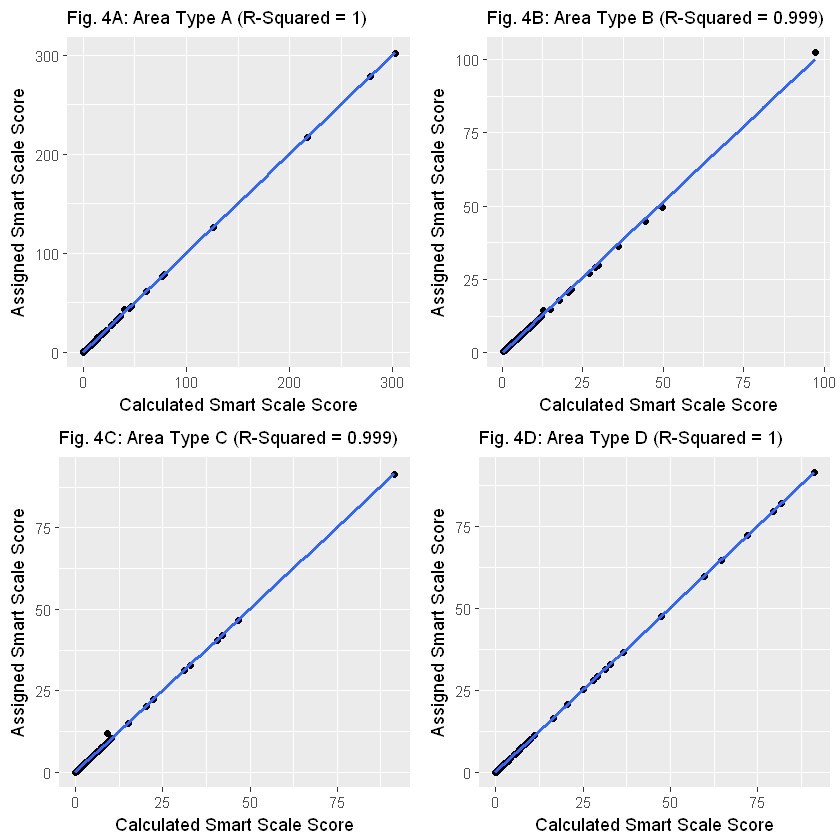

In [27]:
# Given a dataset this function builds a scatterplot with the linear regression trend line.
ss.scatter.plot <- function(dataset, title='Calculated vs. Assigned Smart Scale Scores', title.size=22) {
  ggplot(data=dataset,
         aes(x=Calc.SMART.SCALE.Score, y=SMART.SCALE.Score)) +
    geom_point() + 
    geom_smooth(method=lm) +
    labs(x='Calculated Smart Scale Score', y='Assigned Smart Scale Score', 
         title=title) +
    theme(plot.title = element_text(size=title.size))
}

# Build the linear models for each area type.
a.lm <- lm(SMART.SCALE.Score ~ Calc.SMART.SCALE.Score, data=subset(data, Area.Type == 'A'))
b.lm <- lm(SMART.SCALE.Score ~ Calc.SMART.SCALE.Score, data=subset(data, Area.Type == 'B'))
c.lm <- lm(SMART.SCALE.Score ~ Calc.SMART.SCALE.Score, data=subset(data, Area.Type == 'C'))
d.lm <- lm(SMART.SCALE.Score ~ Calc.SMART.SCALE.Score, data=subset(data, Area.Type == 'D'))

# Build plots for each of the four area types.
sp.a <- ss.scatter.plot(subset(data, Area.Type == 'A'), 
                        paste('Fig. 4A: Area Type A (R-Squared = ', round(summary(a.lm)$r.squared, 3), ')', sep=''), 11)
sp.b <- ss.scatter.plot(subset(data, Area.Type == 'B'), 
                        paste('Fig. 4B: Area Type B (R-Squared = ', round(summary(b.lm)$r.squared, 3), ')', sep=''), 11)
sp.c <- ss.scatter.plot(subset(data, Area.Type == 'C'), 
                        paste('Fig. 4C: Area Type C (R-Squared = ', round(summary(c.lm)$r.squared, 3), ')', sep=''), 11)
sp.d <- ss.scatter.plot(subset(data, Area.Type == 'D'), 
                        paste('Fig. 4D: Area Type D (R-Squared = ', round(summary(d.lm)$r.squared, 3), ')', sep=''), 11)

# Display the four plots within a single grid.
grid.arrange(sp.a, sp.b, sp.c, sp.d, nrow=2) 

The R-squared values are nearly 1.0 for all area types, indicating a near perfect correspondance between calculated and assigned scores. This indicates that the Smart Scale methodology was consistenly applied accross projects.

### 4.2 Synopsis and Conclusions

In this section we examined whether the Smart Scale scoring methodology was consistently applied to the projects in the dataset by independently implementing the calculation method specified in the technical guide and comparing the results to the assigned Smart Scale scores. The degree of agreement was determined using linear regression fitting the assigned score to the calculated score. The results suggest that the methodology was applied consistently and in conformance to the November 2017 technical guide.

## V. The Effect of Prioritizing Accessibility on Fredericksburg Projects

The Fredericksburg area is unique in that a large percentage of its workforce commutes outside the region. Accordingly, in this section we will examine the effect of two hypothetical scenarios which give priority to the Accessibility factor in calculating the Smart Scale Scores of projects in the Fredericksburg district. Specifically, three scenarios will be compared: 1) the current SSS calculation method as specified in the November 2017 technical guide, 2) a SSS calculation method that give priority to the Accessibility factor, and 3) a SSS calculation method that gives priority to the Accessibility factor while simultaneously increasing the Access to Jobs metric by a factor of 1.5 for projects in the Fredericksburg region (explained further below). In each case we will look at the number of Fredericksburg projects appearing in different percentile ranges by Smart Scale Score. These scenarios will be referred to as 1, 2, and 3, respectively.

The Accessibility factor is composed of the weighted average of three measures: 1) Access to Jobs (60%), 2) Access to Jobs for Disadvantaged Populations (20%), and 3) Access to Multimodal Choices (20%) (Nov. 2017 Technical Guide, p. 29). In Appendix C of the technical guide, the "Access to Jobs" measure is defined as the average increase in accessibility to jobs within 45 minutes. According to a recent study, approximately 37% of the workforce in Fredericksburg commutes outside the region, with more than 50% of these commuters commuting for an hour or more [1]. The vast majority of these commute to Northern VA, DC, Richmond, and Maryland - nearly all of which are beyond 45 minutes. A more appropriate measure for Fredericksburg would thus be to use a 75-minute reach or greater. Since there is no way to know how this reach would change the Access to Jobs without the GIS tool, an estimated increase of 1.5 times the current numbers will be used in scenario 3.

To begin, we inspect the number of Fredericksburg projects in different areas:

In [28]:
fb <- subset(data, District=='Fredericksburg')
dt5 <- data.frame(table(fb$Area.Type))
colnames(dt5) <- c('Area.Type', 'Count')
dt5

Area.Type,Count
A,14
B,0
C,0
D,11


Thus, Fredericksburg has 14 projects in area type A and 11 in D for a total of 25 projects. In the technical guide, Table 4.2 on p. 36, the factor weights by area type are as follows:

![alt text](./table-4.2.png)


Since all Fredericksburg projects are within area types A and D, we will reassign priorities as follows. In type A, we will give Accessibility a weight of 45% and Congestion Mitigation a weight of 15%. In type D we will give Accessibility a weight of 35% and Economic Development a weight of 15%.

Below we will recalculate the Smart Scale Scores and percentile ranges under each assumption and see how this changes the distribution of Fredericksburg projects. 

### 5.1 Calculation of Smart Scale Scores Under Scenarios 2 and 3

We begin by calculating the new SSS for scenarios 2 and 3 below.

In [29]:
# ------ Recalculate for scenario 2
# Recalculate Project Benefit with revised weightings and add the new column to the data.
data['Calc.Project.Benefit.Score.Scenario.2'] <- calc.proj.value(data, weight.a=c(0.15, 0.5, 0.45, 0.5, 0.1, 0.2),
                                                                       weight.d=c(0.10, 0.15, 0.35, 0.3, 0.1))
# Add a new SSS column under the scenario 2 assumptions
data['Calc.SMART.SCALE.Score.Scenario.2'] <- (1e7 * data[['Calc.Project.Benefit.Score.Scenario.2']] / 
                                              data[['SMART.SCALE.Request']]) 

# ------ Recalculate for scenario 3
# First, adjust the Fredericksburg Access.to.Jobs values by the designated factor.
a2j.factor <- 1.5
for(i in 1:nrow(data)) {
    if(data[i, 'District'] == 'Fredericksburg') {data[i, 'Access.to.Jobs'] = a2j.factor * data[i, 'Access.to.Jobs']}
}    
# Second, renormalize the Access.to.Jobs column.
data$Access.to.Jobs <- 100 * data$Access.to.Jobs / max(data$Access.to.Jobs)
    
# Third, recalculate the Accessibility factor
data$Accessibility.Score <- weighted.column.average(data, c(0.6, 0.2, 0.2), 
                                                    c('Access.to.Jobs', 'Disadvantaged.Access.to.Jobs', 
                                                      'Multimodal.Access.Score'))
    
# Fourth, add a new column to data with our calculated project benefit scores for scenario 3
data['Calc.Project.Benefit.Score.Scenario.3'] <- calc.proj.value(data, weight.a=c(0.15, 0.5, 0.45, 0.5, 0.1, 0.2),
                                                                       weight.d=c(0.10, 0.15, 0.35, 0.3, 0.1))

# Fifth, add a new SSS column under the scenario 3 assumptions
data['Calc.SMART.SCALE.Score.Scenario.3'] <- (1e7 * data[['Calc.Project.Benefit.Score.Scenario.3']] / 
                                              data[['SMART.SCALE.Request']]) 


### 5.2 Comparison of Scenarios

Below we perform the comparisons of scenarios. We first look at the number of Fredericksburg projects falling into different Smart Scale Score percentile bands in each scenario. By ranking the discrete percentile bands from 1 being the lowest to 8 being the highest, we then compare the average percentile ranking of Smart Scale scores for the Fredericksburg projects under each scenario.

In [30]:
# For a list of ranges and a vector, this function tabulates the counts by range.
tabulate.by.ranges <- function(v, ranges) {
  counts <- c()
  ranges <- sort(ranges)
  i <- 1
  for(i in 1:length(ranges)) {
    if(i == 1) {
      counts[1] <- sum(v <= ranges[1])
    }
    else {
      counts[i] <- sum((v > ranges[i - 1]) & (v <= ranges[i]))
    }
  }
  counts
}

# Compare the scenarios.
sss1.ord <- sort(data$SMART.SCALE.Score)
sss2.ord <- sort(data$Calc.SMART.SCALE.Score.Scenario.2)
sss3.ord <- sort(data$Calc.SMART.SCALE.Score.Scenario.3)
percentiles <- c(0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1) 
cut.scores.1 <- sapply(percentiles, function(p){sss1.ord[ceiling(p * nrow(data))]})
cut.scores.2 <- sapply(percentiles, function(p){sss2.ord[ceiling(p * nrow(data))]})
cut.scores.3 <- sapply(percentiles, function(p){sss3.ord[ceiling(p * nrow(data))]})

fb <- subset(data, District=='Fredericksburg')

counts.1 <- tabulate.by.ranges(fb$SMART.SCALE.Score, cut.scores.1)
counts.2 <- tabulate.by.ranges(fb$Calc.SMART.SCALE.Score.Scenario.2, cut.scores.1)
counts.3 <- tabulate.by.ranges(fb$Calc.SMART.SCALE.Score.Scenario.3, cut.scores.3)

perc.range <-  c('0-5%', '5-10%', '10-25%', '25-50%', 
                 '50-75%', '75-90%', '90-95%', '95-100%')

scenarios <- data.frame(Percentile_Rank=1:length(perc.range),
                        Percentile_Band=perc.range,
                        Scenario_1_Fredericksburg_Project_Count=counts.1,
                        Scenario_2_Fredericksburg_Project_Count=counts.2,
                        Scenario_3_Fredericksburg_Project_Count=counts.3)
scenarios

avg.perc.rank <- data.frame(Scenario=1:3,
                    Average_Fredericksburg_Percentile_Rank=c(sum(scenarios$Percentile_Rank * counts.1) / sum(counts.1),
                                                             sum(scenarios$Percentile_Rank * counts.2) / sum(counts.2),
                                                             sum(scenarios$Percentile_Rank * counts.3) / sum(counts.3)),
                            Average_Fredericksburg_Smart_Scale_Score=c(mean(fb$SMART.SCALE.Score),
                                                                       mean(fb$Calc.SMART.SCALE.Score.Scenario.2),
                                                                       mean(fb$Calc.SMART.SCALE.Score.Scenario.3)))
avg.perc.rank

Percentile_Rank,Percentile_Band,Scenario_1_Fredericksburg_Project_Count,Scenario_2_Fredericksburg_Project_Count,Scenario_3_Fredericksburg_Project_Count
1,0-5%,0,0,0
2,5-10%,2,2,2
3,10-25%,5,2,2
4,25-50%,7,8,8
5,50-75%,5,7,7
6,75-90%,3,1,1
7,90-95%,2,2,2
8,95-100%,1,3,3


Scenario,Average_Fredericksburg_Percentile_Rank,Average_Fredericksburg_Smart_Scale_Score
1,4.48,8.90232
2,4.84,16.79552
3,4.84,17.01152


In the first table above we see the counts of projects within the Fredericksburg district arranged by percentile under scenarios 1 (current), 2 (prioritization of Accessibility factor for area types A and D), and 3 (prioritization of Accessibility factor for area types A and D + 1.5x increased "Access to Jobs" measures for Fredericksburg district). In the second table we see the average Fredericksburg percentile rank and average Fredericksburg Smart Scale Scores for each scenario. Two observations are apparent:

1. There is no major difference between scenarios 2 and 3. The 1.5x increase in "Access to Jobs", while leading to slightly higher average SSS in scenario 3 over scenario 2, was not enough to move the percentile ranks upward any further.

2. There is a noticeable upward movement in Fredericksburg project SSS and percentile rank in scenarios which prioritize the Accessibility factor (i.e. in scenarios 2 and 3), with the 25-50%, 50-75%, and 95-100% bands seeing significant increases in the number of Fredericksburg projects. Of the 25 Fredericksburg projects in the dataset, two projects moved into the 50-75% band and two more moved into the very top band (95-100%). This is summarized by the small rise in average percentile rank from 4.48 under current calculation methodology up to 4.84 under the alternative methodologies in scenarios 2 and 3.

### 5.3 Synopsis and Conclusions

The factor weightings currently used (as specified in the Nov. 2017 technical guide) place relatively low priority on the Accessibility factor in area types A and D and thus do not reflect the unique commuter conditions found in the Fredericksburg region. Accordingly, the full impact of Fredericksburg-based projects may be underestimated under the current Smart Scale Methodology.

## VI. Conclusions

This study performed a statistical analysis on a set of 404 transportation projects scored using the Virginia Smart Scale methodology. Descriptive statistics were first provided which characterize the data over several project features. An analysis was then performed to see whether the Smart Scale methodology was applied consistently to these projects, which entailed replicating the score calculations as specified in the November 2017 Technical Guide and comparing them to the assigned scores. The results indicate that the scoring methodolgy was applied consistently to the projects. Finally, the study considered whether increasing the emphasis on Accessibility in the scoring calculation would increase the competitiveness of projects within the Fredericksburg area. The results indicate that increasing the emphasis on Accessibility would lead to small increases in average percentile ranking of Fredericksburg projects by Smart Scale Score. Accordingly, because Fredericksburg has such a large percentage of its workforce which commutes outside the area, the impact of Fredericksburg-based projects may be underestimated by using the current Smart Scale methodology.   

## References

[1] Hansen, B.A. (2016). "Fredericksburg Region Commuter Workforce Skills Study", University of Mary Washington study prepared for the Fredericksburg Regional Alliance and the Fredericksburg Regional Chamber of Commerce, Accessed at [http://www.umw.edu/news/wp-content/uploads/sites/7/2016/05/Report-on-Commuters-FINAL_mm.pdf](http://www.umw.edu/news/wp-content/uploads/sites/7/2016/05/Report-on-Commuters-FINAL_mm.pdf)